<a href="https://colab.research.google.com/github/AnastasiaZAYU/ml-fundamentals-labs/blob/main/01-Classification-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виконати наступне:
1. Завантажити дані, вивести назви колонок і розмір датасета.

2. Опрацювати пропуски (по можливості заповнити їх або видалити).

3. Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома).

4. Нормалізувати дані.

5. Провести навчання наступних класифікаторів:
* kNN
* дерево ухвалення рішень
* SVM
* Random Forest
* AdaBoost
Підібрати оптимальні параметри для kNN та для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma».

6. Серед обраних оптимальних моделей кожного класу вибрати найкращу.

In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

## 1-2. Робота з датасетом


### Завантаження даних

In [618]:
df=pd.read_csv('advertising_ef.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


### Видалення пропусків

In [619]:
df=df.dropna()

In [620]:
df=df.drop(['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp'],axis=1)

### Вивід розміру датасета

In [621]:
df.shape

(956, 5)

### Вивід назв колонок

In [622]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'],
      dtype='object')

## 3. Візуалізація даних

### Побудова графіку (heatmap), що відображає кореляції ознак між собою і з цільовою змінною 'Clicked on Ad'

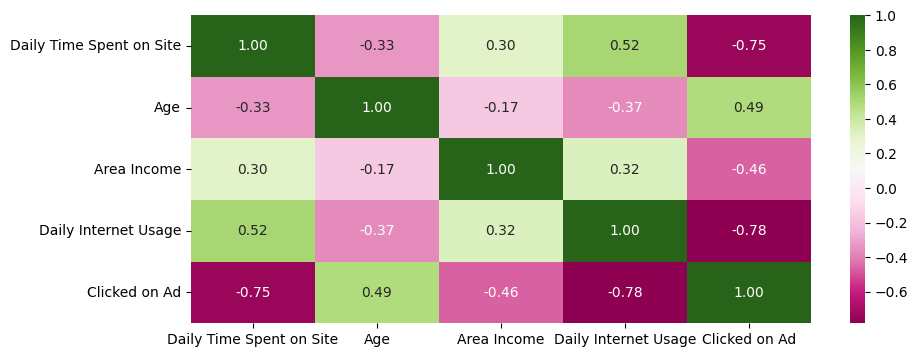

In [623]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(corr,  cmap='PiYG', annot=True, fmt=".2f")
plt.show()

### Побудова гістограми розподілу ознак відносно цільової змінної 'Clicked on Ad'

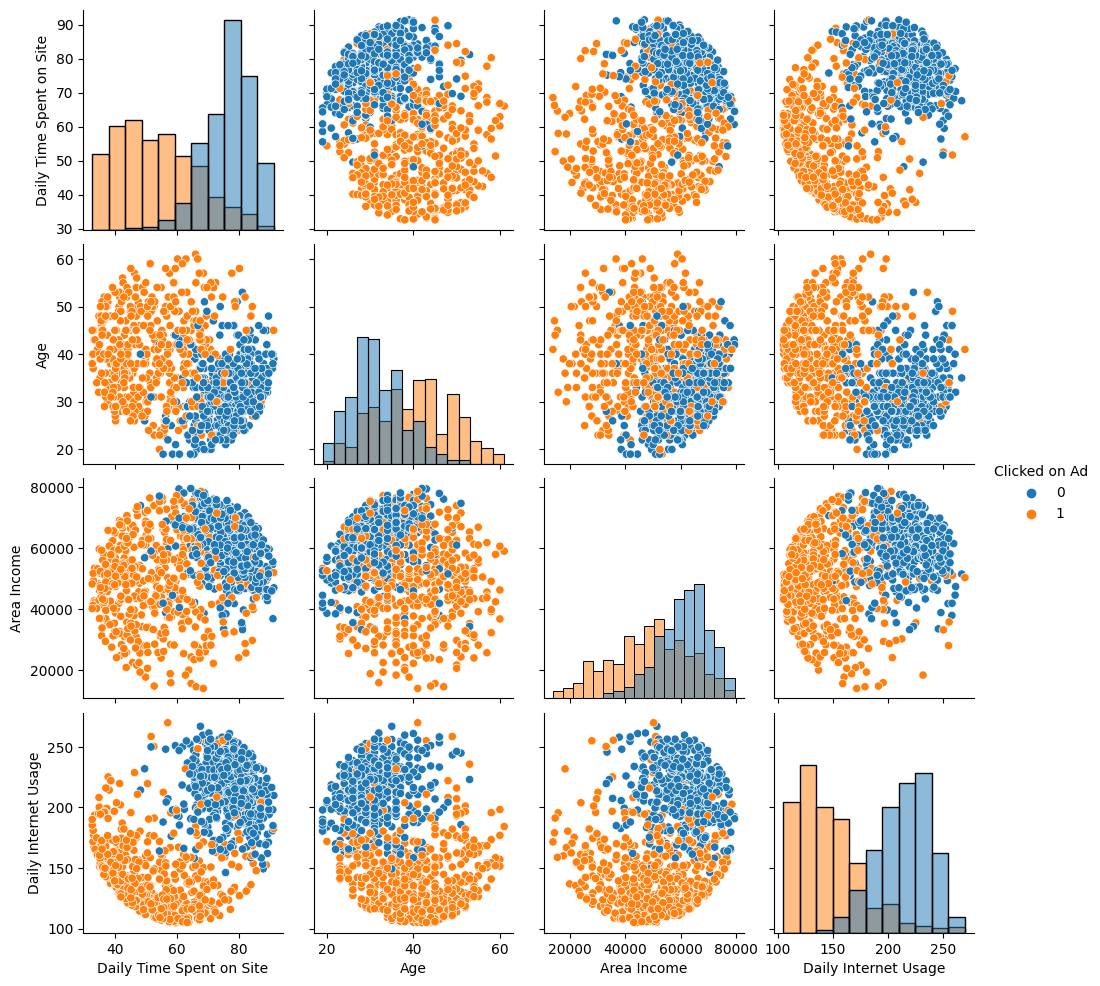

In [624]:
sns.pairplot(df, hue="Clicked on Ad", diag_kind="hist")

### Побудова boxplot-и ознак розподілу ознак відносно цільової змінної 'Clicked on Ad'

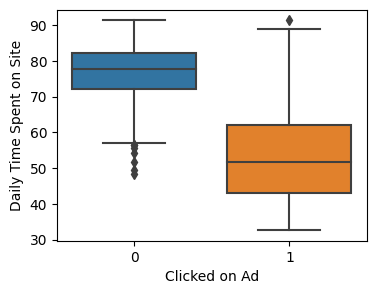

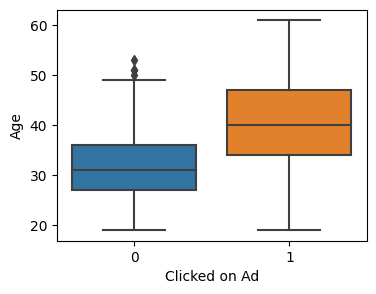

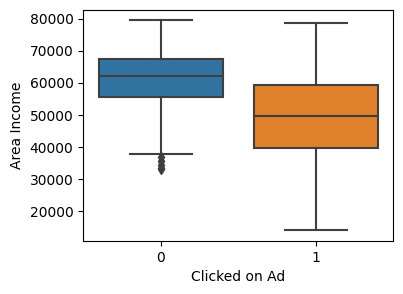

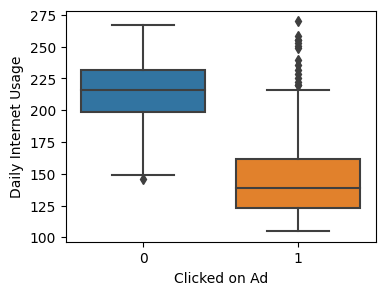

In [625]:
col_names=df.columns

for i in range(len(col_names)-1):
    fig, ax = plt.subplots(figsize=(4, 3))
    ax = sns.boxplot(x='Clicked on Ad', y=col_names[i], data=df)

## 4. Нормалізація даних

In [626]:
X = df.drop(['Clicked on Ad'], axis = 1)
y = df['Clicked on Ad']

In [627]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

## 5. Навчання класифікаторів

In [628]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=10)

### Підбір оптимального параметра для kNN

In [629]:
error_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

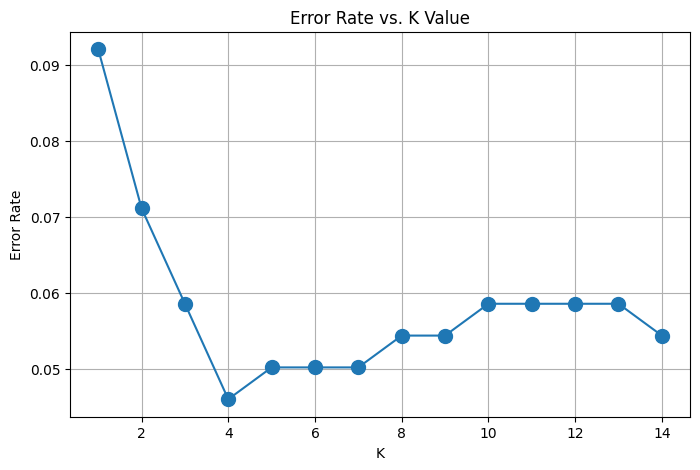

In [630]:
plt.figure(figsize=(8,5))
plt.plot(range(1,15), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

### Навчання класифікатора kNN з параметром k=4

In [631]:
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### Навчання класифікатора Decision Tree

In [632]:
tree = DecisionTreeClassifier(criterion='gini',random_state=1).fit(X_train, y_train)
tree_pred = tree.predict(X_test)

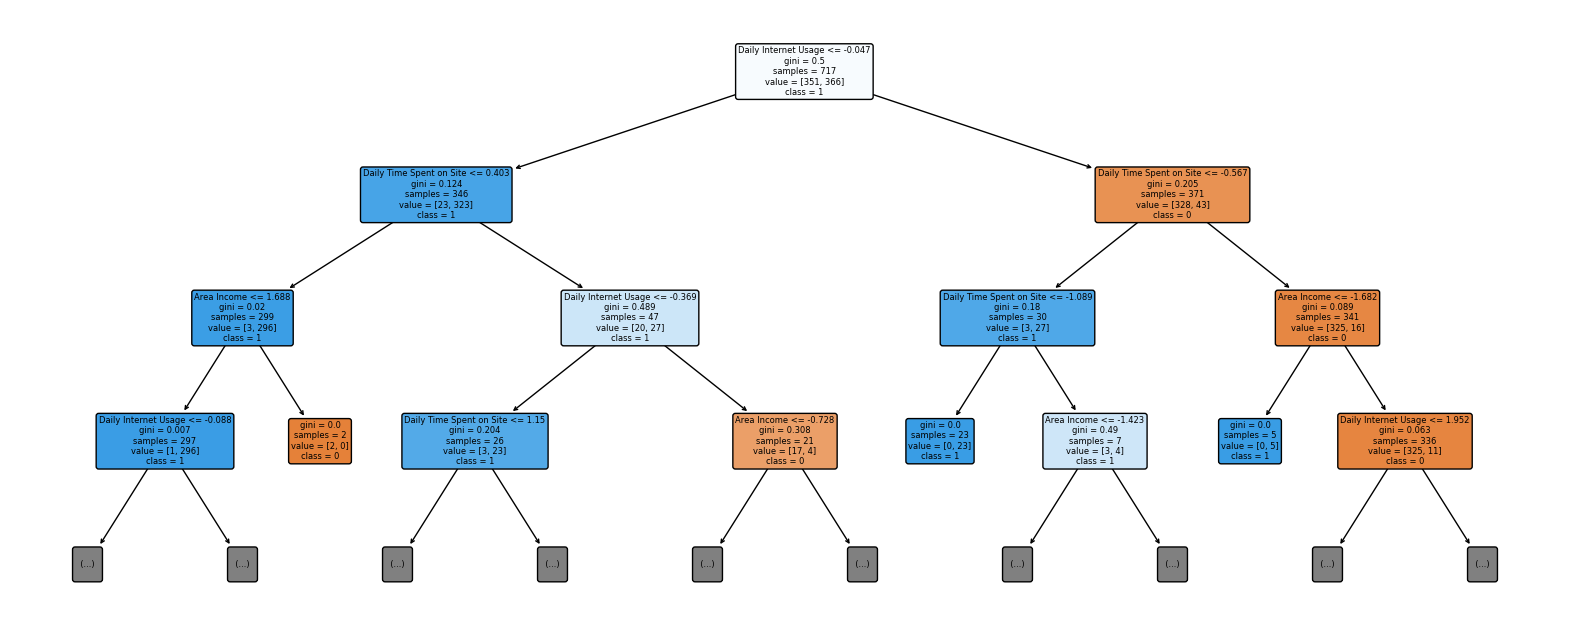

In [633]:
plt.figure(figsize=(20,8))
plot_tree(tree,filled=True,rounded=True,max_depth=3,feature_names=col_names,class_names=['0','1'])
plt.show()

### Навчання класифікатора Random Forest

In [634]:
forest=RandomForestClassifier(criterion='gini',max_depth=3,random_state=1).fit(X_train,y_train)
forest_pred=forest.predict(X_test)

### Підбір оптимальноих параметрів для SVM

In [635]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


### Навчання класифікатора SVM з параметрами С=100 та gamma=0.01

In [636]:
model = SVC(C=100.0, gamma = 0.01, kernel = 'rbf').fit(X_train,y_train)
model_pred = model.predict(X_test)

### Навчання класифікатора AdaBoost

In [637]:
AdaB = AdaBoostClassifier(n_estimators=55, random_state=0).fit(X_train,y_train)
ada_pred = AdaB.predict(X_test)

## 6. Вибір найкращої моделі

### Класифікатор kNN

In [638]:
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[120   2]
 [  9 108]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       122
           1       0.98      0.92      0.95       117

    accuracy                           0.95       239
   macro avg       0.96      0.95      0.95       239
weighted avg       0.96      0.95      0.95       239



### Класифікатор Decision Tree

In [639]:
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

[[111  11]
 [  7 110]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       122
           1       0.91      0.94      0.92       117

    accuracy                           0.92       239
   macro avg       0.92      0.93      0.92       239
weighted avg       0.93      0.92      0.92       239



### Класифікатор Random Forest

In [640]:
print(confusion_matrix(y_test,forest_pred))
print(classification_report(y_test,forest_pred))

[[113   9]
 [  7 110]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       122
           1       0.92      0.94      0.93       117

    accuracy                           0.93       239
   macro avg       0.93      0.93      0.93       239
weighted avg       0.93      0.93      0.93       239



### Класифікатор SVM

In [641]:
print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))

[[117   5]
 [  8 109]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       122
           1       0.96      0.93      0.94       117

    accuracy                           0.95       239
   macro avg       0.95      0.95      0.95       239
weighted avg       0.95      0.95      0.95       239



### Класифікатор AdaBoost

In [642]:
print(confusion_matrix(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

[[112  10]
 [  8 109]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       122
           1       0.92      0.93      0.92       117

    accuracy                           0.92       239
   macro avg       0.92      0.92      0.92       239
weighted avg       0.92      0.92      0.92       239



Отже, найкращою серед побудованих моделей є класифікатор kNN із значенням f1_score = 0.95.